# Data Analysis on Spotify Musics

## Importing the required models

In [1]:
import pandas as pd # this is for data manipulation and analysis
import numpy as np # this is for numerical computation
import matplotlib.pyplot as plt # this is for building graphs
import seaborn as sns # this is for statistical data visualizations

## Loading the data Set and Checking the dataset description

In [2]:
Spotify = pd.read_csv("Spotify_Youtube.csv")

### Reading fisrt few rows of the dataset

In [3]:
print(Spotify.head(5))

   Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impal

### lets list the column names

In [4]:
print(Spotify.columns)

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')


### Lets get a look at the datatypes and if they are missing values

In [5]:
print(Spotify.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

## Data Cleaning

#### Missing Values

In [6]:
# Lets check for columns with missing data
Spotify.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [7]:
# Lets drop the rows with NAs
Spotify = Spotify.dropna()

In [8]:
#Lets check for rows with NA again
Spotify.isnull().sum()

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

#### DataType Manipulation

In [9]:
#Lets change the datatypes of Licensed and official_video to boolean
Spotify["Licensed"] = Spotify["Licensed"].astype("bool")
Spotify["official_video"] = Spotify["official_video"].astype("bool")

## Exploratory Data Analysis

#### Artist with the Best Best Track

In [10]:
# Extracting the columns I need
track_best_streams = Spotify[["Artist", "Track", "Stream"]]

# Grouping by Track and Artist
track_best_streams = track_best_streams.groupby(["Track", "Artist"]).sum().reset_index()

# Sorting the data by Streams and extracting the top 10
track_best_streams = track_best_streams.sort_values("Stream", ascending = False).head(10)

# preview
track_best_streams.head(10)

,Track,Artist,Stream
2111,Blinding Lights,The Weeknd,3.386520e+09
14082,Shape of You,Ed Sheeran,3.362005e+09
14645,Someone You Loved,Lewis Capaldi,2.634013e+09
18831,rockstar (feat. 21 Savage),Post Malone,2.594927e+09
15114,Sunflower - Spider-Man: Into the Spider-Verse,Swae Lee,2.538330e+09
15113,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2.538330e+09
11694,One Dance,Drake,2.522432e+09
3107,Closer,Halsey,2.456205e+09
3111,Closer,The Chainsmokers,2.456205e+09
1881,Believer,Imagine Dragons,2.369272e+09


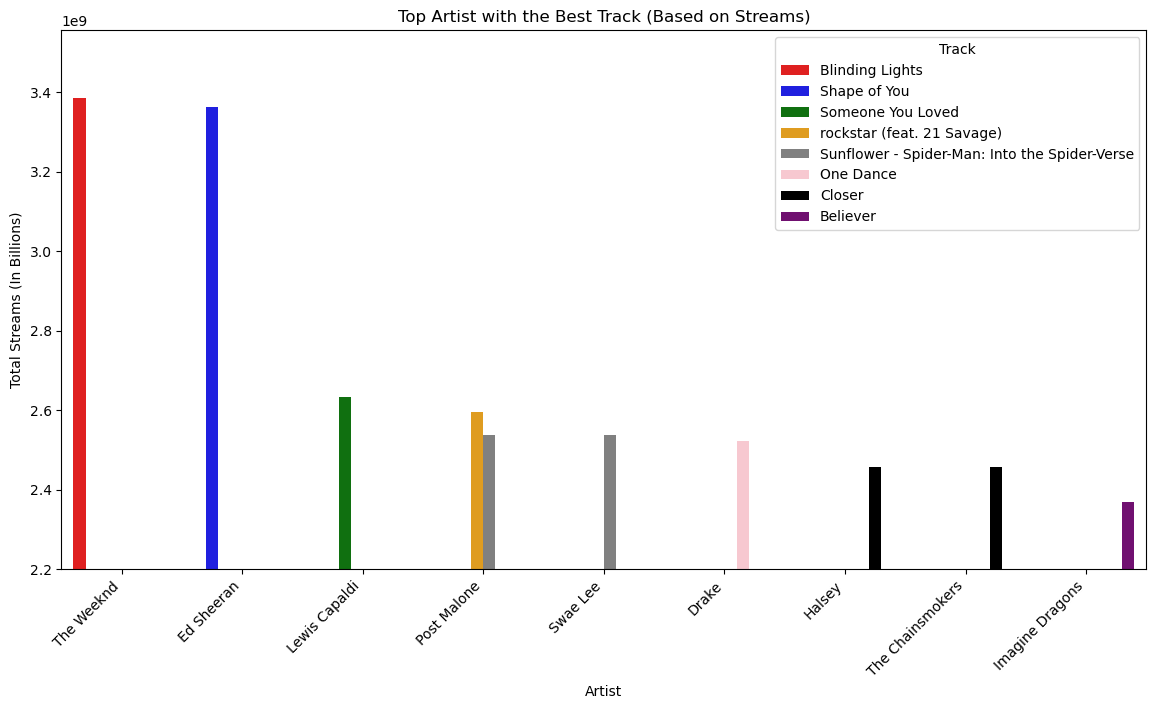

In [11]:
# Visualization
plt.figure(figsize=(14, 7))
mycolors = ["red", "blue", "green", "orange", "gray", "pink", "black", "purple"] #"navyblue", "brown"
sns.barplot(x= track_best_streams["Artist"], y= track_best_streams["Stream"], hue = track_best_streams["Track"], palette = mycolors)
plt.title("Top Artist with the Best Track (Based on Streams)")
plt.xlabel("Artist")
plt.ylabel("Total Streams (In Billions)")
plt.xticks(rotation = 45, ha = "right")
plt.ylim(2200000000)
plt.show()

#### The preferred album type based on Streams

In [12]:
# Extracting  the columns needed
album_type_streams = Spotify[["Album_type", "Stream"]]

# grouping the dataset by album type
album_type_streams = album_type_streams.groupby("Album_type").sum()

# preview
album_type_streams.head()

,Stream
Album_type,
album,2.114051e+12
compilation,5.951055e+10
single,4.771631e+11


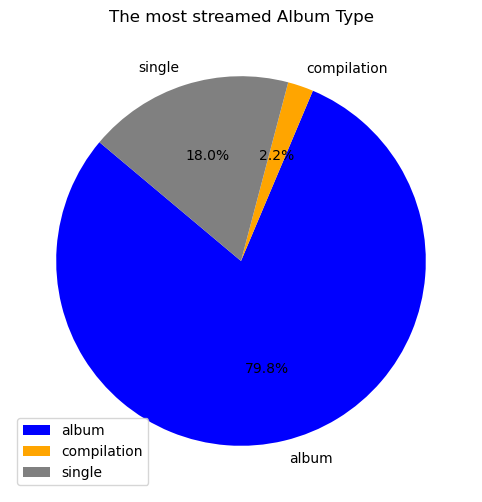

In [13]:
# visualization

plt.figure(figsize= (12, 6))

plt.pie(labels = album_type_streams.index, x = album_type_streams["Stream"],autopct="%1.1f%%", startangle=140,colors= ["blue", "orange", "gray"])
plt.title("The most streamed Album Type")
plt.legend()
plt.show()

#### The best album with the most streams

In [14]:
# Extracting the columns i need
best_album_stream = Spotify[["Artist", "Album", "Stream"]]

# grouping the dataset
best_album_stream = best_album_stream.groupby(["Album", "Artist"]).sum().reset_index()

# Sorting the dataset based on Streams\
best_album_stream = best_album_stream.sort_values("Stream", ascending = False).head(10)

# preview
best_album_stream.head(10)

,Album,Artist,Stream
9619,SOUR,Olivia Rodrigo,8.325355e+09
5121,Hollywood's Bleeding,Post Malone,6.954563e+09
13300,÷ (Deluxe),Ed Sheeran,6.835601e+09
4363,Future Nostalgia,Dua Lipa,5.443751e+09
593,After Hours,The Weeknd,5.294236e+09
113,17,XXXTENTACION,5.287963e+09
3858,Evolve,Imagine Dragons,5.237943e+09
12054,Un Verano Sin Ti,Bad Bunny,5.060743e+09
4137,Fine Line,Harry Styles,5.035279e+09
8715,Planet Her,Doja Cat,5.006440e+09


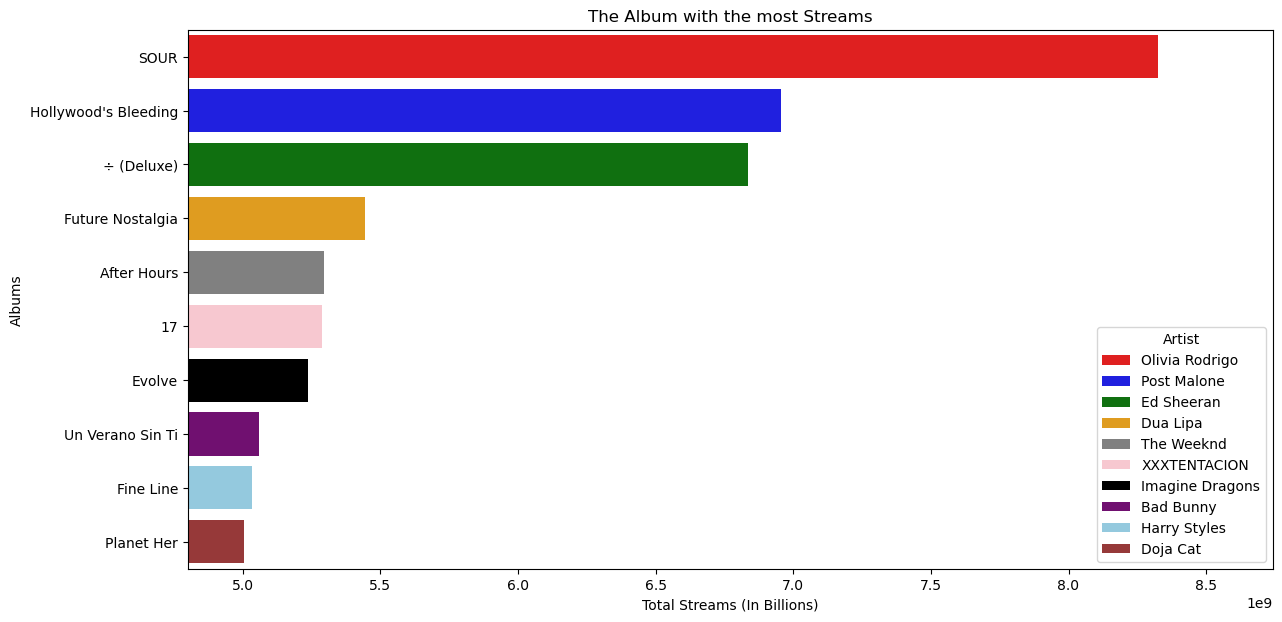

In [15]:
# Visualization
plt.figure(figsize= (14, 7))
mycolorsalbum = ["red", "blue", "green", "orange", "gray", "pink", "black", "purple", "skyblue", "brown"]

sns.barplot(y = best_album_stream["Album"], x = best_album_stream["Stream"], hue = best_album_stream["Artist"], palette = mycolorsalbum)
plt.title("The Album with the most Streams")
plt.ylabel("Albums")
plt.xlabel("Total Streams (In Billions)")
plt.xlim(4800000000)
plt.show()

#### The Best Artist Overall based on Streams

In [16]:
# Extracting the columns i need
best_artist_stream = Spotify[["Artist", "Stream", "Views"]]

# grouping based on Artist
best_artist_stream = best_artist_stream.groupby("Artist").sum().reset_index()

# sorting by streams and extracting the top 10
best_artist_stream = best_artist_stream.sort_values("Stream", ascending = False).head(10)

# preview
best_artist_stream.head(10)

,Artist,Stream,Views
1470,Post Malone,1.525126e+10,6.394420e+09
516,Ed Sheeran,1.439488e+10,1.546021e+10
497,Dua Lipa,1.340808e+10,8.216339e+09
1829,The Weeknd,1.246428e+10,6.859509e+09
1965,XXXTENTACION,1.201191e+10,2.542795e+09
764,Imagine Dragons,1.185831e+10,9.093785e+09
375,Coldplay,1.177848e+10,9.997278e+09
962,Khalid,1.138684e+10,5.398246e+09
125,Ariana Grande,1.085741e+10,4.458246e+09
199,Billie Eilish,1.074717e+10,4.821569e+09


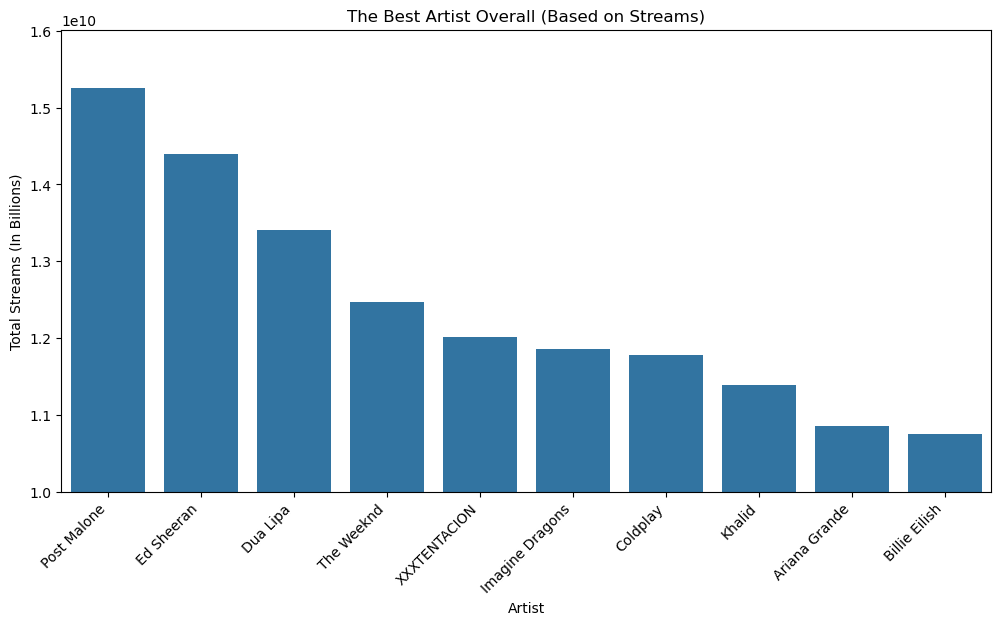

In [17]:
# Visualization
plt.figure(figsize = (12, 6))

sns.barplot(x = best_artist_stream["Artist"], y = best_artist_stream["Stream"])
plt.title("The Best Artist Overall (Based on Streams)")
plt.xlabel("Artist")
plt.ylabel("Total Streams (In Billions)")
plt.ylim(10000000000)
plt.xticks(rotation = 45, ha = "right")
plt.show()

#### The Best Youtube Channel based on Streams

In [18]:
# Extracting the columns needed
best_channel_stream = Spotify[["Channel","Artist", "Stream"]]

# grouping based on Channel
best_channel_stream  = best_channel_stream.groupby(["Channel", "Artist"]).sum().reset_index().sort_values("Stream", ascending =False)

# preview
best_channel_stream.head(10)

,Channel,Artist,Stream
1996,Ed Sheeran,Ed Sheeran,1.365590e+10
5380,PostMaloneVEVO,Post Malone,1.243216e+10
2973,ImagineDragonsVEVO,Imagine Dragons,1.185831e+10
6962,TheWeekndVEVO,The Weeknd,1.114888e+10
1220,ChainsmokersVEVO,The Chainsmokers,1.039670e+10
815,BillieEilishVEVO,Billie Eilish,1.021950e+10
969,Bruno Mars,Bruno Mars,9.963335e+09
481,ArianaGrandeVevo,Ariana Grande,9.832019e+09
6129,ShawnMendesVEVO,Shawn Mendes,9.774908e+09
1397,Coldplay,Coldplay,9.272299e+09


#### Conflict on Official Video based on streams

In [19]:
# Extracting the columns needed
official_streams = Spotify[["official_video", "Stream"]]

# Grouping by official video
official_streams = official_streams.groupby("official_video").sum()

# preview
official_streams.head()

,Stream
official_video,
False,3.537308e+11
True,2.296994e+12


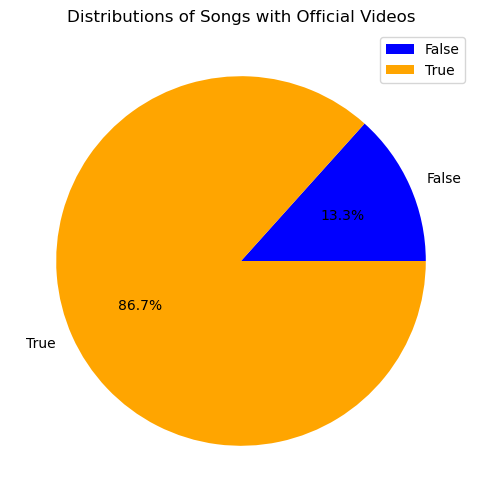

In [20]:
# Visualization
plt.figure(figsize = (12, 6))
plt.pie(x= official_streams["Stream"], labels = official_streams.index, autopct = "%1.1f%%", colors = ["blue", "orange"])
plt.title("Distributions of Songs with Official Videos")
plt.legend(official_streams.index)
plt.show()

#### Conflict of Getting Licence

In [21]:
# Extracting the columns that I need
license_streams = Spotify[["Licensed", "Stream"]]

# grouping by License
license_streams = license_streams.groupby("Licensed").sum()

# preview
license_streams.head()

,Stream
Licensed,
False,5.390126e+11
True,2.111712e+12


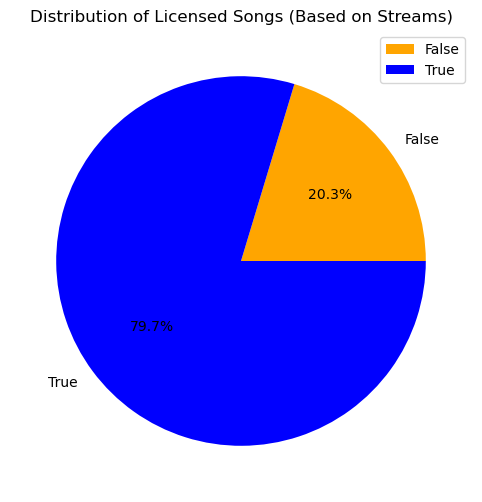

In [22]:
# Visualization
plt.figure(figsize = (12, 6))

plt.pie(x= license_streams["Stream"], labels = license_streams.index, autopct= "%1.1f%%", colors = ["orange", "blue"])
plt.title("Distribution of Licensed Songs (Based on Streams)")
plt.legend(license_streams.index)
plt.show()

#### Correlation Analysis between Views, Streams, Likes and Comments

In [23]:
# Extracting the columns we need
correlation_variables = Spotify[['Views', 'Likes','Comments',  'Stream']]

# getting the correlation matrix for the heatmap
correlation_matrix = correlation_variables.corr()

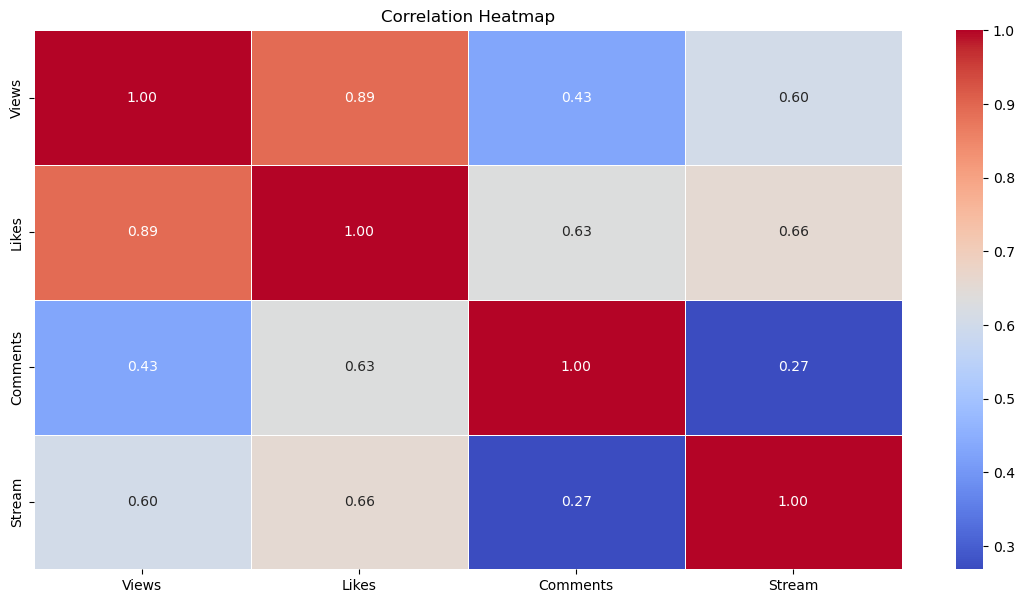

In [24]:
# Visualization
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()